#### Vivian Xia
## Comparing Search Algorithm Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

from random import seed
from random import random

from tabulate import tabulate

In [2]:
#binary search algorithm
class BinarySearch():

  def search_iterative(self, list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
      # The guess was too high.
      if guess > item:
        high = mid - 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None


In [3]:
#linear search algorithm
def linear_search(mylist, item):
    
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
        
    return None

In [4]:
#sort, binary, linear search times
def sort_search_time(array_len):
    """ Sort and Search Time Algorithm.
    
    Time the sort on a list of random integers.
    Time the binary and linear search for the last/maximum value in the array.
    
    Parameters
    ----------
    array_len: length that is generated in the array.
    
    """
    
    bs = BinarySearch()
    time.sleep(1) #suspend execution for 1 seconds to capture a better level of detail
    np.random.seed(12345) #set random number seed
    
    start_time = time.perf_counter()
    set = np.sort(np.random.randint(1, 10000, array_len)) #generate random list between 1 to 10000 then sort
    end_time = time.perf_counter()
    sort_time_set = end_time - start_time #sorting time
    
    start_time = time.perf_counter()
    bs.search_iterative(set, set[-1]) #binary search on the list to find its last value
    end_time = time.perf_counter()
    bs_time = end_time - start_time #binary search time
    
    start_time = time.perf_counter()
    linear_search(set, set[-1]) #linear search on the list to find its last value 
    end_time = time.perf_counter()
    ls_time = end_time - start_time #linear search time
    
    return array_len, sort_time_set, ls_time, bs_time, sort_time_set + bs_time

In [5]:
length_array = [512, 1024, 2048, 4096, 8192] #list of array lengths
time_list = [] #empty list to store sorting and searching times

for length in length_array:
    time_list.append(sort_search_time(length)) #use sort search time algorithm for each length and store in time_list

In [6]:
col_names = ["Array Length","Sort Time", "Linear Search Time", "Binary Search Time", "Binary Search Time + Sort Time"]

print(tabulate(time_list, headers=col_names, tablefmt="fancy_grid"))

╒════════════════╤═════════════╤══════════════════════╤══════════════════════╤══════════════════════════════════╕
│   Array Length │   Sort Time │   Linear Search Time │   Binary Search Time │   Binary Search Time + Sort Time │
╞════════════════╪═════════════╪══════════════════════╪══════════════════════╪══════════════════════════════════╡
│            512 │ 0.000507375 │          0.000318875 │           2.825e-05  │                      0.000535625 │
├────────────────┼─────────────┼──────────────────────┼──────────────────────┼──────────────────────────────────┤
│           1024 │ 0.000384625 │          0.000519667 │           2.4042e-05 │                      0.000408667 │
├────────────────┼─────────────┼──────────────────────┼──────────────────────┼──────────────────────────────────┤
│           2048 │ 0.000411584 │          0.00104108  │           2.2584e-05 │                      0.000434168 │
├────────────────┼─────────────┼──────────────────────┼──────────────────────┼──────────

The linear search times are slower than the binary search times consistently for each corresponding array length. The linear search times continue to increase to twice the time for double the amount in array length. The binary search time generally decreases as the array length doubles. 

In [7]:
df = pd.DataFrame(time_list) #create a dataframe of the list of times
df.columns = col_names
df.head()

,Array Length,Sort Time,Linear Search Time,Binary Search Time,Binary Search Time + Sort Time
0,512,0.000507,0.000319,0.000028,0.000536
1,1024,0.000385,0.000520,0.000024,0.000409
2,2048,0.000412,0.001041,0.000023,0.000434
3,4096,0.000663,0.002207,0.000021,0.000685
4,8192,0.001366,0.005596,0.000034,0.001400


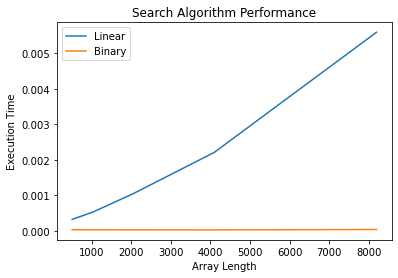

In [8]:
plt.plot(df['Array Length'], df['Linear Search Time'], label = 'Linear') #plot linear search times
plt.plot(df['Array Length'], df['Binary Search Time'], label = 'Binary') #plot binary search times

plt.title('Search Algorithm Performance')
plt.xlabel('Array Length')
plt.ylabel('Execution Time')
plt.legend()

plt.show()

The linear search algorithm searches for the number by checking each element one by one starting from the first element. On the other hand, the binary search algorithm searches for the number by continuously checking the middle element to narrow the list down by half the number of elements each time until the number is found. 

In order to run a search algorithm, the list of elements must be sorted. In a list of n elements, the linear search takes n steps to run the worst case in the length of a list, so it can be denoted as O(n). The linear search runs on linear time which can be seen in the table and graph above. In the graph, the linear search times steadily increases at the same rate or slope as the array length increases. From the table, it can be seen that, as the array length doubles, the linear search times also approximately doubles as well. 

The binary search takes log2 n steps to run the worst case, which is also denoted as O(log n). The binary search runs on logarithmic time. In the graph, the binary search times stay around the similar low execution times even when the array length increases. It can be seen in the table, the binary search time from a list of 1024 elements is actually faster than the search time for a list of 512 elements. As the the number of elements continue to increase, the search time for binary searches decreases. 

From both the table and graph, it is evident that the linear search times will always be slower than the binary search times for worst cases, especially when the load starts to increase. The binary search algorithm will be useful to data engineers when it comes to finding a specific number, item, user, etc. in a large list or database in the shortest time possible. It also accomodates for future growth in the load, so performance will not be compromised. 